In [22]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'


In [23]:
import numpy as np
from tensorflow.keras.datasets import mnist
import warnings

# Suppress all Python warnings
warnings.filterwarnings('ignore')

# Load the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# Normalize the pixel values to the range [-1, 1]
x_train = x_train.astype('float32') / 127.5 - 1.
x_train = np.expand_dims(x_train, axis=-1)

# Print the shape of the data
print(x_train.shape)

(60000, 28, 28, 1)


Build the generrator model

In [24]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape 

# Define the generator model 
def build_generator(): 
    model = Sequential() 
    model.add(Dense(256, input_dim=100)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(BatchNormalization(momentum=0.8)) 
    model.add(Dense(512)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(BatchNormalization(momentum=0.8)) 
    model.add(Dense(1024)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(BatchNormalization(momentum=0.8)) 
    model.add(Dense(2048))
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(BatchNormalization(momentum=0.8)) 
    model.add(Dense(28 * 28 * 1, activation='tanh')) 
    model.add(Reshape((28, 28, 1))) 
    return model 

# Build the generator 
generator = build_generator() 
generator.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               25856     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_22 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 512)               0         
                                                                 
 batch_normalization_8 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [30]:
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LeakyReLU
import tensorflow as tf

# Define the discriminator model 
def build_discriminator(): 
    model = Sequential() 
    model.add(Flatten(input_shape=(28, 28, 1))) 
    model.add(Dense(512)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(Dense(256)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(Dense(1, activation='sigmoid')) 
    return model 

# Build and compile the discriminator 
discriminator = build_discriminator() 
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), metrics=['accuracy']) 
discriminator.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 512)               401920    
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 1)                 257       
                                                                 
Total params: 533,505
Trainable params: 533,505
Non-tr

Build the gan model

In [26]:
from tensorflow.keras.layers import Input 
from tensorflow.keras.models import Model 

# Create the GAN by stacking the generator and the discriminator 
def build_gan(generator, discriminator): 
    discriminator.trainable = False 
    gan_input = Input(shape=(100,)) 
    generated_image = generator(gan_input) 
    gan_output = discriminator(generated_image) 
    gan = Model(gan_input, gan_output) 
    gan.compile(loss='binary_crossentropy', optimizer='adam') 
    return gan 

# Build the GAN 
gan = build_gan(generator, discriminator) 
gan.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_6 (Sequential)   (None, 28, 28, 1)         4403728   
                                                                 
 sequential_7 (Sequential)   (None, 1)                 533505    
                                                                 
Total params: 4,937,233
Trainable params: 4,396,048
Non-trainable params: 541,185
_________________________________________________________________


Training gang

In [27]:
# # # Define and compile the discriminator model
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import Dense, LeakyReLU, Flatten

# # def build_discriminator():
# #     model = Sequential()
# #     model.add(Flatten(input_shape=(28, 28, 1)))
# #     model.add(Dense(512))
# #     model.add(LeakyReLU(alpha=0.2))
# #     model.add(Dense(256))
# #     model.add(LeakyReLU(alpha=0.2))
# #     model.add(Dense(1, activation='sigmoid'))
# #     return model

# # Build and recompile the discriminator
# discriminator = build_discriminator()
# discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# discriminator.summary()

2/2 [==============================] - 0s 2ms/step
0 [D loss: 1.0903672575950623] [D accuracy: 40.625] [G loss: 5.438494682312012]
2/2 [==============================] - 0s 2ms/step
10 [D loss: 0.019015131751075387] [D accuracy: 100.0] [G loss: 1.3796117305755615]
2/2 [==============================] - 0s 2ms/step
20 [D loss: 0.0036554388934746385] [D accuracy: 100.0] [G loss: 0.283103346824646]
2/2 [==============================] - 0s 2ms/step
30 [D loss: 0.0017543465364724398] [D accuracy: 100.0] [G loss: 0.04848109185695648]
2/2 [==============================] - 0s 2ms/step
40 [D loss: 0.0012024444295093417] [D accuracy: 100.0] [G loss: 0.036018408834934235]
2/2 [==============================] - 0s 3ms/step


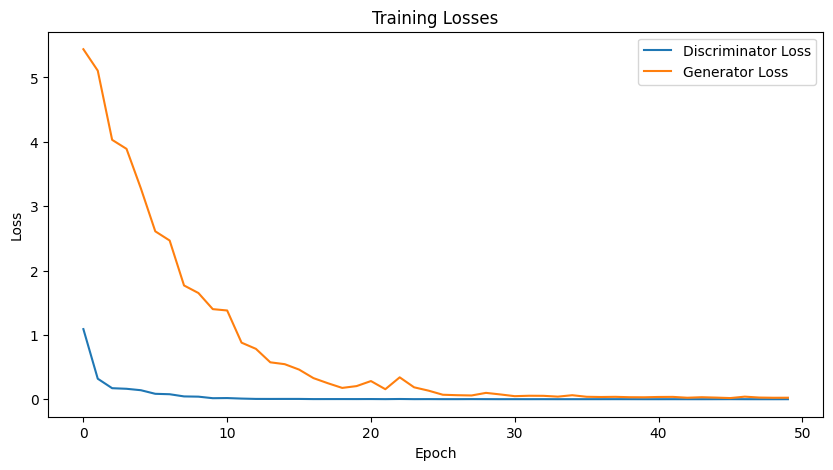

: 

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store losses 
d_losses = [] 
g_losses = [] 

 
# Training loop with loss storage 
for epoch in range(epochs): 
    idx = np.random.randint(0, x_train.shape[0], batch_size) 
    real_images = x_train[idx] 
    noise = np.random.normal(0, 1, (batch_size, 100)) 
    generated_images = generator.predict(noise) 
    d_loss_real = discriminator.train_on_batch(real_images, real) 
    d_loss_fake = discriminator.train_on_batch(generated_images, fake) 
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) 
    d_losses.append(d_loss[0]) 
  

    noise = np.random.normal(0, 1, (batch_size, 100)) 
    g_loss = gan.train_on_batch(noise, real) 
    g_losses.append(g_loss) 

  
    if epoch % sample_interval == 0: 
        print(f"{epoch} [D loss: {d_loss[0]}] [D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]") 
  
# Plot the training losses 
plt.figure(figsize=(10, 5)) 
plt.plot(d_losses, label='Discriminator Loss') 
plt.plot(g_losses, label='Generator Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Training Losses') 
plt.legend() 
plt.show()


Evaluatin the gan


Cualitative

1/1 [==============================] - 0s 93ms/step


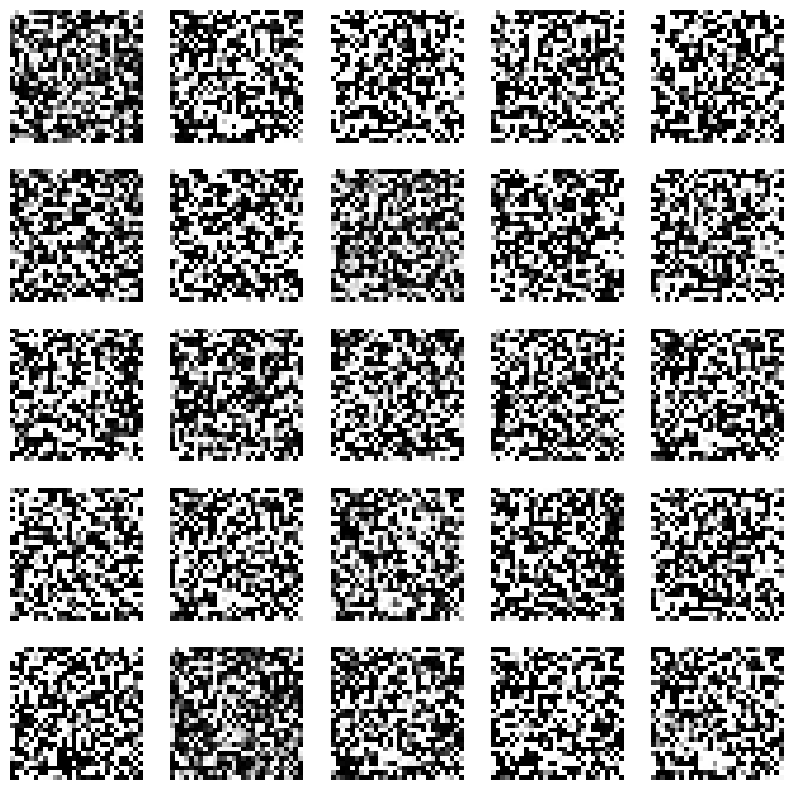

In [29]:
import matplotlib.pyplot as plt 

def sample_images(generator, epoch, num_images=25): 
    noise = np.random.normal(0, 1, (num_images, 100)) 
    generated_images = generator.predict(noise) 
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1] 
    fig, axs = plt.subplots(5, 5, figsize=(10, 10)) 
    count = 0 

    for i in range(5): 
        for j in range(5): 
            axs[i, j].imshow(generated_images[count, :, :, 0], cmap='gray') 
            axs[i, j].axis('off') 
            count += 1 
    plt.show() 

# Sample images at the end of training 
sample_images(generator, epochs)

Cuantitavite


In [11]:
# Calculate and print the discriminator accuracy on real vs. fake images
noise = np.random.normal(0, 1, (batch_size, 100))
generated_images = generator.predict(noise)

# Evaluate the discriminator on real images
real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
d_loss_real = discriminator.evaluate(real_images, np.ones((batch_size, 1)), verbose=0)

# Evaluate the discriminator on fake images
d_loss_fake = discriminator.evaluate(generated_images, np.zeros((batch_size, 1)), verbose=0)

print(f"Discriminator Accuracy on Real Images: {d_loss_real[1] * 100:.2f}%")
print(f"Discriminator Accuracy on Fake Images: {d_loss_fake[1] * 100:.2f}%")

2/2 [==============================] - 0s 3ms/step
Discriminator Accuracy on Real Images: 100.00%
Discriminator Accuracy on Fake Images: 95.31%
